<a href="https://colab.research.google.com/github/deepraj16/50-days-of-deep-learning/blob/main/day22(Dog%20vs%20cat).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:04<00:00, 214MB/s]
100% 1.06G/1.06G [00:04<00:00, 238MB/s]


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('dogs-vs-cats.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [4]:
#cnn model for given code working

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
! pip install opencv-python

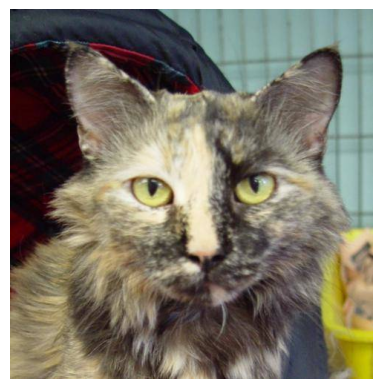

In [8]:
import cv2
img = cv2.imread("/content/test/cats/cat.10.jpg")  # Load an image
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")  # Hide axis labels
plt.show()

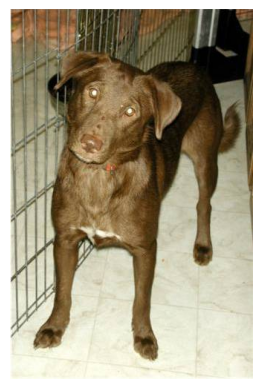

In [9]:
img2=cv2.imread("/content/train/dogs/dog.1.jpg")
img_rgb2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb2)
plt.axis('off')
plt.show()

In [10]:
# Genrator in  keras
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

# image preprocessing of data for working Normaliton or converting into batches

Found 20000 files belonging to 2 classes.


In [11]:
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode ='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 5000 files belonging to 2 classes.


In [12]:

# normalizes  making pils size of 0-1
def process(image,label):
  image=tf.cast(image/255. , tf.float32)
  return image,label

  train_ds=train_ds.map(process)
  validation_ds=validation_ds.map(process)


In [13]:
# create CNN model

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
                    # kerna -- > filter used
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,732,705 (14.24 MB)

 Trainable params: 3,732,705 (14.24 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [17]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.5106 - loss: 2.8255 - val_accuracy: 0.5308 - val_loss: 0.6918
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.5359 - loss: 0.6864 - val_accuracy: 0.5446 - val_loss: 0.6916
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.5413 - loss: 0.6827 - val_accuracy: 0.5364 - val_loss: 0.6999
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.5719 - loss: 0.6597 - val_accuracy: 0.5452 - val_loss: 0.7388
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 69ms/step - accuracy: 0.6089 - loss: 0.6311 - val_accuracy: 0.5478 - val_loss: 0.8087
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.6297 - loss: 0.6128 - val_accuracy: 0.5378 - val_loss: 0.8050
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.6547 - loss: 0.5646 - val_accuracy: 0.5412 - val_loss: 0.9336
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.6884 - loss: 0.5318 - 

In [18]:
history2 = model.fit(
    train_ds,
    epochs=15,
    initial_epoch=10,
    validation_data=validation_ds
)

Epoch 11/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.7341 - loss: 0.4782 - val_accuracy: 0.5376 - val_loss: 1.3308
Epoch 12/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.7697 - loss: 0.4041 - val_accuracy: 0.5356 - val_loss: 1.4705
Epoch 13/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.7858 - loss: 0.3732 - val_accuracy: 0.5388 - val_loss: 1.6233
Epoch 14/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 64ms/step - accuracy: 0.7928 - loss: 0.3638 - val_accuracy: 0.5448 - val_loss: 1.8195
Epoch 15/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.8089 - loss: 0.3404 - val_accuracy: 0.5472 - val_loss: 1.8804


In [19]:
history2 = model.fit(
    train_ds,
    epochs=20,
    initial_epoch=16,
    validation_data=validation_ds
)

Epoch 17/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.8158 - loss: 0.3502 - val_accuracy: 0.5290 - val_loss: 1.9357
Epoch 18/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.8397 - loss: 0.2918 - val_accuracy: 0.5446 - val_loss: 2.1001
Epoch 19/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 72ms/step - accuracy: 0.8490 - loss: 0.2794 - val_accuracy: 0.5440 - val_loss: 2.2449
Epoch 20/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.8678 - loss: 0.2352 - val_accuracy: 0.5512 - val_loss: 2.6007


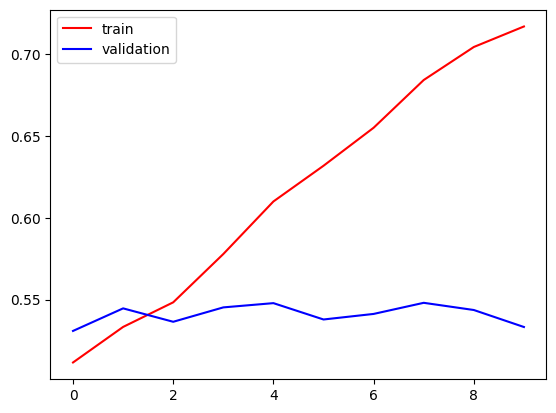

In [20]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

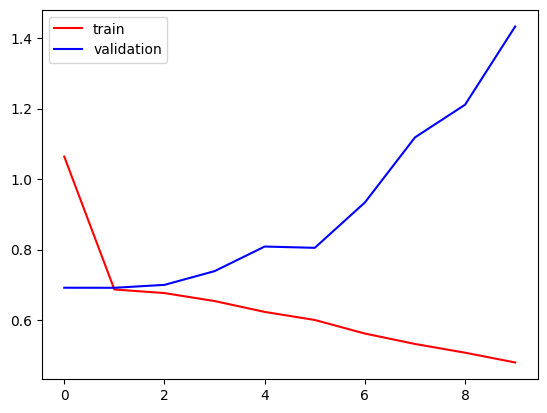

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [22]:

# overfiting data from

#Solve the problems

#Add more data
#Data Augumentation -->next
# L1 /L2 Regulartion
#Dropout
#Batch Norm
#Reduce complexity

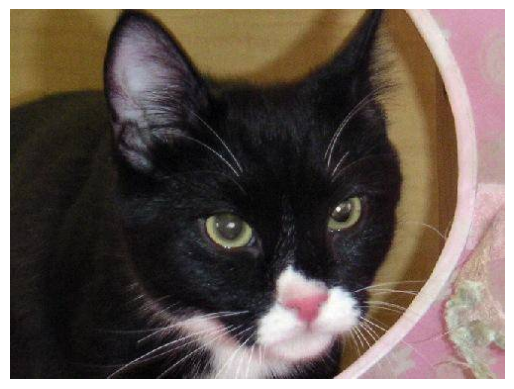

In [26]:
img34 = cv2.imread("/content/test/cats/cat.10001.jpg")  # Load an image
img_rgb34 = cv2.cvtColor(img34, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb34)
plt.axis('off')
plt.show()

In [32]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and resize the image
img_path = "/content/test/cats/cat.10001.jpg"  # Update with your image path
img = image.load_img(img_path, target_size=(256, 256))  # Resize to match model input size
img_array = image.img_to_array(img)  # Convert to NumPy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize (if your model expects it)


In [33]:
prediction = model.predict(img_array)  # Get model prediction

# Assuming the model uses a Sigmoid activation in the output layer
if prediction[0] > 0.5:
    print("It's a Dog 🐶")
else:
    print("It's a Cat 🐱")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step
It's a Cat 🐱


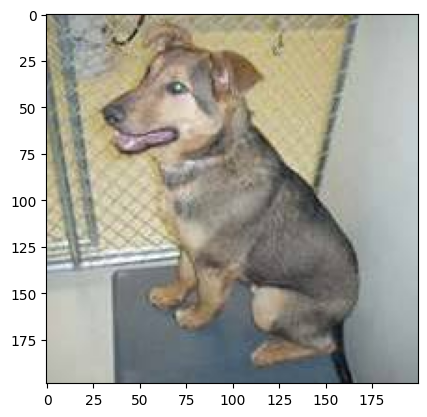

In [43]:
img35="/content/test/dogs/dog.1002.jpg"
img_rgb35=cv2.imread(img35)
img_rgb35=cv2.cvtColor(img_rgb35,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb35)
plt.show()

In [44]:
img_path = img35  # Update with your image path
img = image.load_img(img_path, target_size=(256, 256))  # Resize to match model input size
img_array = image.img_to_array(img)  # Convert to NumPy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize (if your model expects it)


In [47]:
prediction = model.predict(img_array)  # Get model prediction

# Assuming the model uses a Sigmoid activation in the output layer
if prediction[0] > 0.5:
    print("It's a Dog 🐶")
else:
    print("It's a Cat 🐱")

print(prediction[0])



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
It's a Cat 🐱
[1.0633737e-16]
